In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.losses import mean_absolute_percentage_error

Using TensorFlow backend.


In [2]:
# watch for any changes in the utils module, and reload it automatically
%load_ext autoreload
%autoreload 2

In [3]:
from utils.generate_models import generate_models, generate_DeepConvLSTM_model
from utils.validate_models import find_best_architecture, evaluate_model, evaluate_plot
from utils.data_generator import DataGenerator
from utils.get_dataset_pulsi import get_dataset_pulsi

In [4]:
columns = np.array(['bpm', 'spo2'])
dataset_reduced_std, dataset_reduced = get_dataset_pulsi(columns,
                                                         filename='./utils/test_data/42nights.csv')

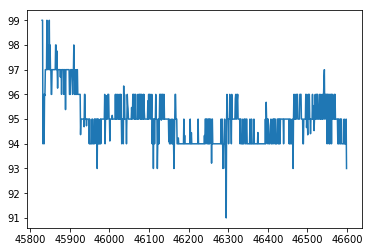

In [5]:
plt.plot(dataset_reduced[dataset_reduced["name"] == 'h_17-04-27']["spo2"])

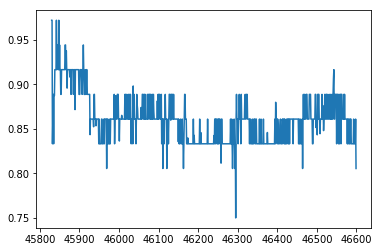

In [6]:
plt.plot(dataset_reduced_std[dataset_reduced_std["name"] == 'h_17-04-27']["spo2"])

In [7]:
window_size = 12            # ventana de valores para la prediccion
dim_length = window_size
number_of_predictions = 4   # numero de predicciones en la salida
output_dim = number_of_predictions
target_variable = "spo2"
dim_channels = 2            # 2 variables

In [8]:
#cv_fold_size = len(val_gen)*batch_size
batch_size = 32
metric = mean_absolute_percentage_error

In [9]:
train_names_reduced = np.array(['p_17-01-19', 'p_17-01-20'])
val_names_reduced = np.array(['p_17-01-21'])
test_names_reduced = np.array(['p_17-01-22'])
train_gen_reduced = DataGenerator(dataset_reduced_std, train_names_reduced,
                                  "spo2", batch_size=batch_size,
                                  number_of_predictions=number_of_predictions,
                                  window_size=window_size,
                                  step_prediction_dates=1, shuffle=False,
                                  rebalance_data=False, debug=False)
val_gen_reduced = DataGenerator(dataset_reduced_std, val_names_reduced,
                                "spo2", batch_size=batch_size,
                                number_of_predictions=number_of_predictions,
                                window_size=window_size,
                                step_prediction_dates=1, shuffle=False,
                                rebalance_data=False, debug=False)
test_gen_reduced = DataGenerator(dataset_reduced_std, test_names_reduced,
                                 "spo2", batch_size=batch_size,
                                 number_of_predictions=number_of_predictions,
                                 window_size=window_size,
                                 step_prediction_dates=1, shuffle=False,
                                 rebalance_data=False, debug=False)

In [10]:
# simple
hyperparameters_simple = {}
regularization_rate_simple = 10 ** -4 # max bound
hyperparameters_simple['regularization_rate'] = regularization_rate_simple
learning_rate_simple = 10 ** -4 # max bound
hyperparameters_simple['learning_rate'] = learning_rate_simple
filters_simple = []
hyperparameters_simple['filters'] = filters_simple
lstm_dims_simple = [100]
hyperparameters_simple['lstm_dims'] = lstm_dims_simple

dropout_rnn_simple = 0.75
dropout_cnn_simple = 0.75

nrepochs_simple = 150

In [11]:
model = generate_DeepConvLSTM_model(dim_length, dim_channels, output_dim,
                                    filters_simple, lstm_dims_simple, learning_rate_simple,
                                    regularization_rate_simple, dropout=None,
                                    dropout_rnn=dropout_rnn_simple, dropout_cnn=dropout_cnn_simple,
                                    metrics=[mean_absolute_percentage_error])

models_simple = [(model, hyperparameters_simple)]

In [12]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                           verbose=False, number_of_models=None, nr_epochs=nrepochs_simple,
                           early_stopping=True, batch_size=batch_size,
                           models=models_simple, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

In [13]:
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.021937931592818104, 273885.3536797489]
validation error = [0.013900715919987998, 8.765666047034905]
testing error = [0.01246934337218925, 8.752279208955311]


In [14]:
# from GC_find_best_arch_250_rnn_1_pulsi
hyperparameters_losses = {}
regularization_rate_losses = 0.0001
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0089
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = []
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [63]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.85
dropout_cnn_losses = None

nrepochs_losses = 58

In [14]:
# from GC_find_best_arch_250_rnn_1_cnn_1_pulsi / lossses
hyperparameters_losses = {}
regularization_rate_losses = 0.0666
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0006
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [78]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [100]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.74
dropout_cnn_losses = 0.27

nrepochs_losses = 96

In [14]:
# from GC_find_best_arch_250_rnn_1_cnn_1_pulsi / metrics (MAPE)
hyperparameters_losses = {}
regularization_rate_losses = 0.0303
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0012
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [82]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [71]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.61
dropout_cnn_losses = 0.30

nrepochs_losses = 70

In [14]:
# from GC_find_best_arch_250_rnn_2_cnn_2_pulsi / metrics (MAPE)
hyperparameters_losses = {}
regularization_rate_losses = 0.01
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.00075
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [58, 78]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [34]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.34
dropout_cnn_losses = 0.66

nrepochs_losses = 108

In [14]:
# from GC_find_best_arch_250_rnn_3_cnn_3_pulsi / losses
hyperparameters_losses = {}
regularization_rate_losses = 0.0006
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.024
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [46, 12]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [33, 41, 14]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.40
dropout_cnn_losses = 0.255

nrepochs_losses = 50

In [14]:
# from GC_find_best_arch_250_rnn_4_cnn_4_pulsi / metric
hyperparameters_losses = {}
regularization_rate_losses = 0.031
hyperparameters_losses['regularization_rate'] = regularization_rate_losses
learning_rate_losses = 0.0007
hyperparameters_losses['learning_rate'] = learning_rate_losses
filters_losses = [63, 33, 40, 98]
hyperparameters_losses['filters'] = filters_losses
lstm_dims_losses = [77]
hyperparameters_losses['lstm_dims'] = lstm_dims_losses

dropout_rnn_losses = 0.61
dropout_cnn_losses = 0.43

nrepochs_losses = 89

In [15]:
model = generate_DeepConvLSTM_model(dim_length, dim_channels, output_dim,
                                    filters_losses, lstm_dims_losses, learning_rate_losses,
                                    regularization_rate_losses, dropout=None,
                                    dropout_rnn=dropout_rnn_losses, dropout_cnn=dropout_cnn_losses,
                                    metrics=[mean_absolute_percentage_error])
models_losses = [(model, hyperparameters_losses)]

In [16]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                           verbose=False, number_of_models=None, nr_epochs=nrepochs_losses,
                           early_stopping=True, batch_size=batch_size,
                           models=models_losses, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

In [17]:
# results for GC_find_best_arch_250_rnn_1_pulsi
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.003365931528108587, 344432.4292913205]
validation error = [0.002750312768414215, 4.286815814605433]
testing error = [0.002528825425794872, 4.275414687111264]


In [17]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi / lossses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.0039689944775132754, 340453.42583180394]
validation error = [0.002927365622568001, 4.062873565861854]
testing error = [0.002801362276419965, 4.099923393943093]


In [17]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.0037272494175631756, 350469.77672794246]
validation error = [0.004614090511175425, 5.686184617411423]
testing error = [0.0040526386146792475, 5.075729549498785]


In [17]:
# results for GC_find_best_arch_250_rnn_2_cnn_2_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.004286125559914619, 349287.0757534562]
validation error = [0.005239557159158931, 5.994689027966314]
testing error = [0.004496789730790986, 5.122393176772378]


In [17]:
# results for GC_find_best_arch_250_rnn_3_cnn_3_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.005834611842542623, 380655.83346442686]
validation error = [0.009298993827761115, 9.51157728113925]
testing error = [0.007748699149830484, 7.933397231989609]


In [17]:
# results for GC_find_best_arch_250_rnn_4_cnn_4_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen_reduced, val_gen_reduced, test_gen_reduced,
                   best_model_losses)

training error = [0.00510570154323821, 363426.09390496154]
validation error = [0.004701816269142884, 5.693287302876077]
testing error = [0.004436188880646464, 5.598475853911726]


In [18]:
# full dataset
train_names = np.array(['p_17-01-19', 'p_17-01-20', 'p_17-01-21', 'p_17-01-22', 'p_17-01-23', 'p_17-01-24', 'p_17-01-25',
                        'p_17-01-26', 'p_17-01-27', 'p_17-01-28', 'p_17-01-29', 'p_17-01-30', 'p_17-01-31', 'p_17-02-01',
                        'p_17-02-02', 'p_17-02-03', 'p_17-02-04', 'p_17-02-05', 'p_17-02-06', 'p_17-02-07', 'p_17-02-08',
                        'p_17-02-09', 'p_17-02-10'])
val_names = np.array(['p_17-02-11', 'p_17-02-12', 'p_17-02-13', 'p_17-02-14', 'p_17-02-15', 'p_17-02-16', 'p_17-02-17', 'p_17-02-18'])
test_names = np.array(['p_17-02-19', 'p_17-02-20', 'p_17-02-21', 'p_17-02-22', 'p_17-02-23', 'p_17-02-24', 'p_17-02-25', 'p_17-04-27'])
train_gen = DataGenerator(dataset_reduced_std, train_names,
                          "spo2", batch_size=batch_size,
                          number_of_predictions=number_of_predictions,
                          window_size=window_size,
                          step_prediction_dates=1, shuffle=False,
                          rebalance_data=False, debug=False)
val_gen = DataGenerator(dataset_reduced_std, val_names,
                        "spo2", batch_size=batch_size,
                        number_of_predictions=number_of_predictions,
                        window_size=window_size,
                        step_prediction_dates=1, shuffle=False,
                        rebalance_data=False, debug=False)
test_gen = DataGenerator(dataset_reduced_std, test_names,
                         "spo2", batch_size=batch_size,
                         number_of_predictions=number_of_predictions,
                         window_size=window_size,
                         step_prediction_dates=1, shuffle=False,
                         rebalance_data=False, debug=False)

In [19]:
# in this case, find_best_architecture is only used for training the model
np.random.seed(3)
verbose=True
early_stopping=False

best_model_losses, best_params_losses, best_model_metrics, best_params_metrics, debug = \
    find_best_architecture(train_gen, val_gen, test_gen,
                           verbose=True, number_of_models=None, nr_epochs=500, # let early stopping decide
                           early_stopping=True, batch_size=batch_size,
                           models=models_losses, metric=mean_absolute_percentage_error, use_testset=True,
                           debug=False, test_retrain=False, output_all=True)

Training model 0
{'regularization_rate': 0.0666, 'learning_rate': 0.0006, 'filters': [78], 'lstm_dims': [100]}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 12, 2)             8         
_________________________________________________________________
reshape_1 (Reshape)          (None, 12, 2, 1)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 2, 78)         312       
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 2, 78)         312       
_________________________________________________________________
activation_1 (Activation)    (None, 12, 2, 78)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 2, 78)         0         
_______________________________

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



826/826 [==============================] - 24s 29ms/step - loss: 0.0046 - mean_absolute_percentage_error: 33848.5201 - val_loss: 0.0040 - val_mean_absolute_percentage_error: 5.2661
Epoch 28/500
826/826 [==============================] - 23s 28ms/step - loss: 0.0046 - mean_absolute_percentage_error: 34070.6971 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 5.0969
Epoch 29/500
826/826 [==============================] - 25s 30ms/step - loss: 0.0046 - mean_absolute_percentage_error: 33567.1662 - val_loss: 0.0037 - val_mean_absolute_percentage_error: 4.9002
Epoch 30/500
826/826 [==============================] - 24s 29ms/step - loss: 0.0046 - mean_absolute_percentage_error: 34258.7715 - val_loss: 0.0038 - val_mean_absolute_percentage_error: 4.7779
Epoch 31/500
826/826 [==============================] - 24s 29ms/step - loss: 0.0046 - mean_absolute_percentage_error: 34105.2204 - val_loss: 0.0033 - val_mean_absolute_percentage_error: 4.5014
Epoch 32/500
826/826 [=====================

In [21]:
# results for GC_find_best_arch_250_rnn_1_pulsi
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.003804316383619068, 32485.210777499076]
validation error = [0.003807017759993997, 5.2881936227811925]
testing error = [0.0031749701943378345, 4.710687689180348]


In [20]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.003892653040938483, 32933.74795564615]
validation error = [0.0037286166213731436, 4.683855150241464]
testing error = [0.0032345462888579107, 4.2484283782713534]


In [21]:
# results for GC_find_best_arch_250_rnn_1_cnn_1_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.003976392038294097, 33202.94705787078]
validation error = [0.00387808251662917, 4.896068948319573]
testing error = [0.0031461096261365803, 4.2984464745611035]


In [20]:
# results for GC_find_best_arch_250_rnn_2_cnn_2_pulsi / metrics
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.004456330533453936, 31600.25603575029]
validation error = [0.0041585465747755925, 5.675504051193628]
testing error = [0.004364994156671234, 5.900217003605001]


In [21]:
# results for GC_find_best_arch_250_rnn_3_cnn_3_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.008401816677139025, 36225.758453285474]
validation error = [0.008323190037236064, 8.057710367900158]
testing error = [0.005402425081012196, 6.087141514591493]


In [20]:
# results for GC_find_best_arch_250_rnn_4_cnn_4_pulsi / losses
train_predict, val_predict, test_predict = \
    evaluate_model(train_gen, val_gen, test_gen,
                   best_model_losses)

training error = [0.004998062107792275, 34038.13614258664]
validation error = [0.004849414834675175, 6.1178331716688765]
testing error = [0.004153769038487775, 5.535932985975659]


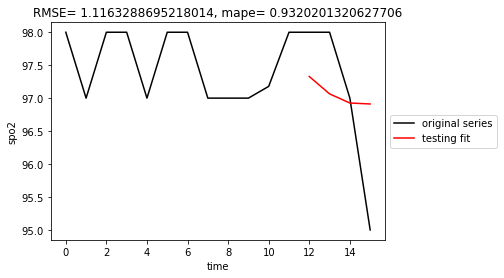

(1.1163288695218014, 0.9320201320627706)

In [21]:
from utils.validate_models import mape
evaluate_plot(dataset_reduced, test_gen, test_predict,
              target_variable=target_variable, metric=mape,
              prediction=0)

371


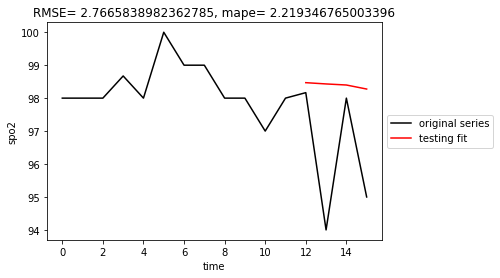

372


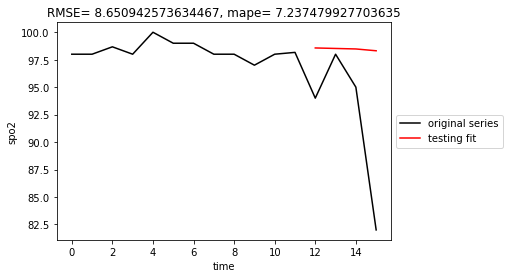

373


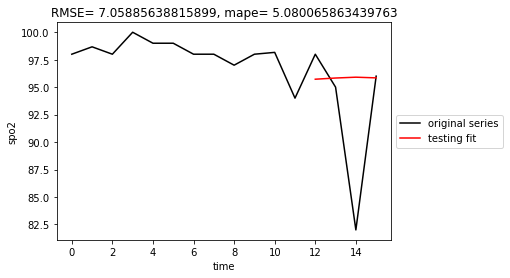

374


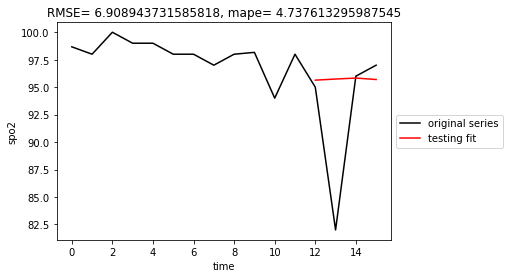

375


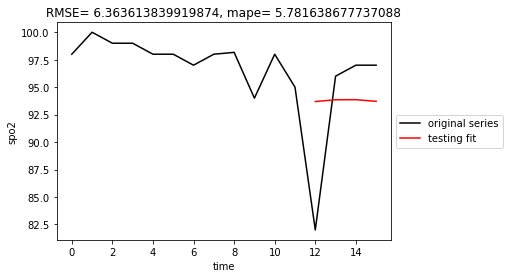

376


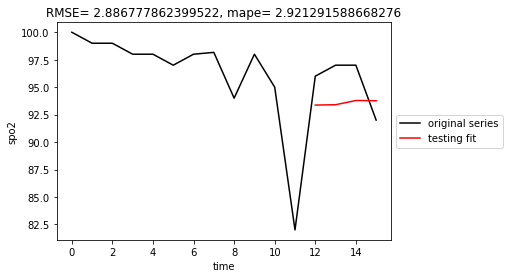

377


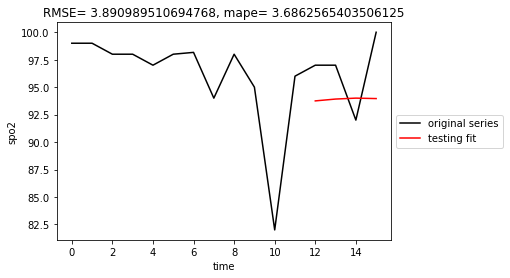

378


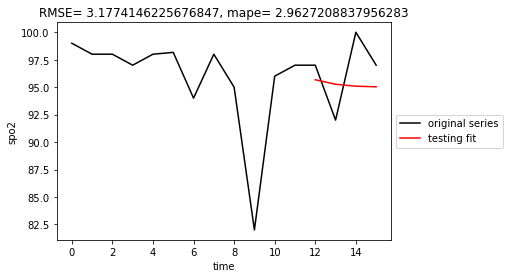

379


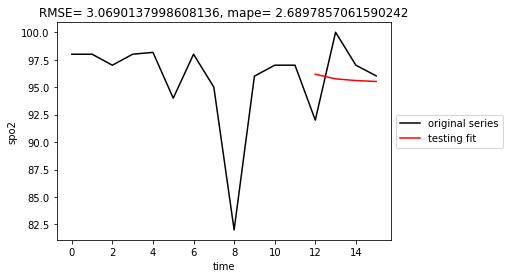

380


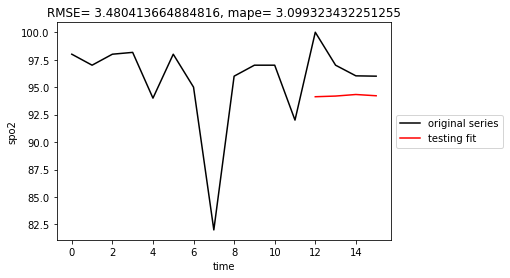

381


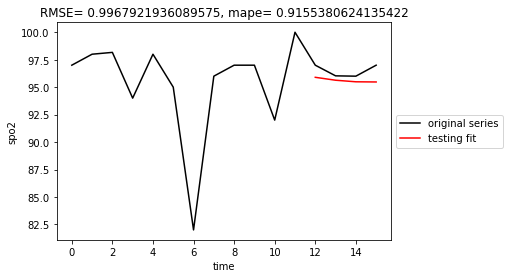

382


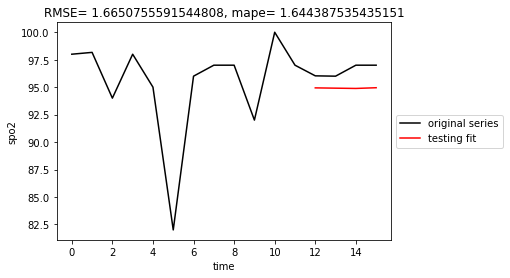

383


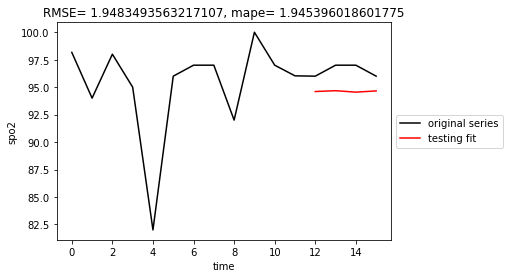

384


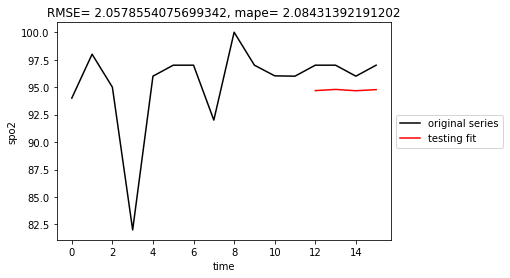

In [22]:
for prediction in range(371,385):
    print(prediction)
    evaluate_plot(dataset_reduced, test_gen, test_predict,
                  target_variable=target_variable, metric=mape,
                  prediction=prediction)

In [23]:
hyperparameters_losses

{'regularization_rate': 0.0666,
 'learning_rate': 0.0006,
 'filters': [78],
 'lstm_dims': [100]}